In [8]:
import os

In [9]:
data_dir = r"C:\Users\keerthivasan.s\Desktop\AI ML Training\TF_2_Notebooks_and_Data\cell_images"

In [10]:
os.listdir(data_dir)

['test', 'train']

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from matplotlib.image import imread

In [13]:
test_path = data_dir + '\\test'
train_path = data_dir + '\\train'

In [14]:
test_path

'C:\\Users\\keerthivasan.s\\Desktop\\AI ML Training\\TF_2_Notebooks_and_Data\\cell_images\\test'

In [15]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [16]:
os.listdir(train_path+'\\parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [17]:
para_cell = train_path+'\\parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'


In [18]:
para_cell

'C:\\Users\\keerthivasan.s\\Desktop\\AI ML Training\\TF_2_Notebooks_and_Data\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [19]:
imread(para_cell).shape

(148, 142, 3)

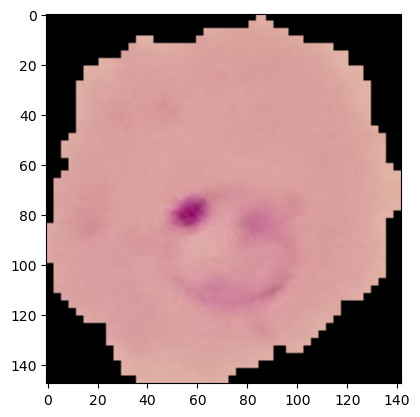

In [20]:
plt.imshow(imread(para_cell))

In [21]:
os.listdir(train_path+'\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [22]:
uninfected_cell = train_path+'\\uninfected'+'\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

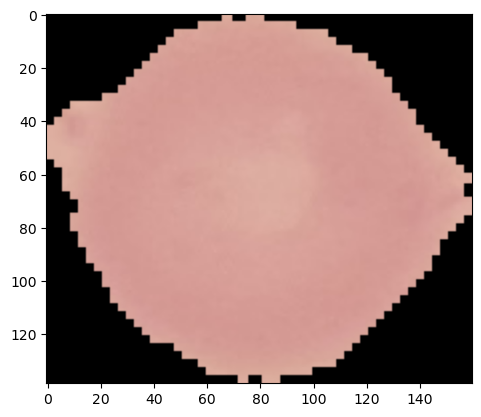

In [23]:
plt.imshow(imread(uninfected_cell))

In [24]:
pwd

'C:\\Users\\keerthivasan.s\\Desktop\\AI ML Training'

In [25]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

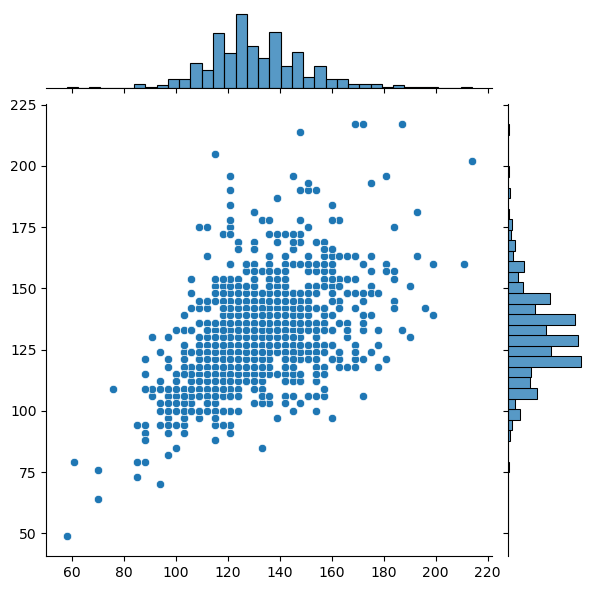

In [26]:
sns.jointplot(x=dim1,y=dim2)

In [27]:
np.mean(dim1)

130.92538461538462

In [28]:
np.mean(dim2)

130.75

In [29]:
image_shape = (130,130,3)

In [30]:
# MNIST 28*28 = 784 datapoints
# CIFAR20 32*32*3 = 3072 datapoints
# This Dataset 130*130*3 = 50700 datapoints

# As datapoints increases we can select batches in it.

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
# help(ImageDataGenerator)

# We are generating images using imagegenerator brcause we have 30000 images
#which is very small sample size, so expand this we do data augumentation using
#the dataset itself by rotating, mirroring, etc... this helps to improve our sample
#size and the model can have more idea and not be overfitting to the model

In [33]:
imread(para_cell).max()  #already normalized image dataset is given

0.9098039

In [34]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

# if the image dataset is not normalized we can rescale using the rescale
#parameter in imagedatagenerator as 1/255 if max pixel is 255.
# shear_range cuts off the part of the image if 0.1 the 10% of the image is cut.

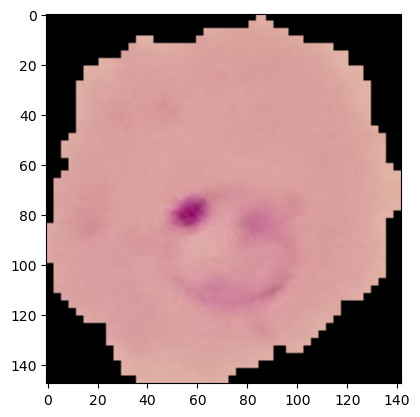

In [35]:
para_img = imread(para_cell)
plt.imshow(para_img)

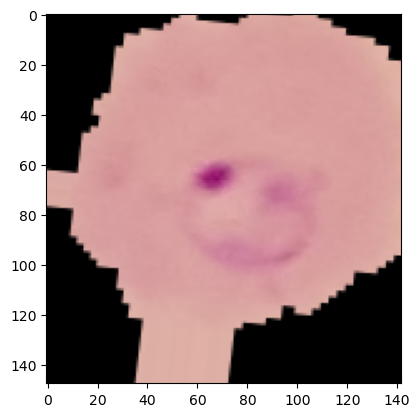

In [36]:
plt.imshow(image_gen.random_transform(para_img))

### flow_from_directory
*) to execute flow_from_directory the directory should be in specific order so that it will work otherwise won't work.

Structure needed

 *) Image data folder\
     *) Class 1\
         0.jpg\
         1.jpg\
         .....\
     *) Class 2\
         0.jpg\
         1.jpg\
         .....\
     *) ...\
     *) Class N



In [37]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Activation

In [42]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = (130,130,3),
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
#the above line can be written also as model.add(Dense(128, activation='relu'))

#input_shape is defined by the average of dim1,dim2

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [35]:
len(dim1)

1300

In [36]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### image_gen.flow_from_directory

*) it helps to make flow from directory directly.

In [39]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [40]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

Found 2600 images belonging to 2 classes.


In [41]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [42]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [43]:
results = model.fit(train_image_gen,epochs=2,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/2


1560/1560 [==============================] - 163s 104ms/step - loss: 1.0045 - accuracy: 0.5422 - val_loss: 0.6807 - val_accuracy: 0.5842
Epoch 2/2
1560/1560 [==============================] - 160s 103ms/step - loss: 0.6767 - accuracy: 0.5843 - val_loss: 0.6649 - val_accuracy: 0.6104


In [44]:
losses = pd.DataFrame(model.history.history)

<Axes: >

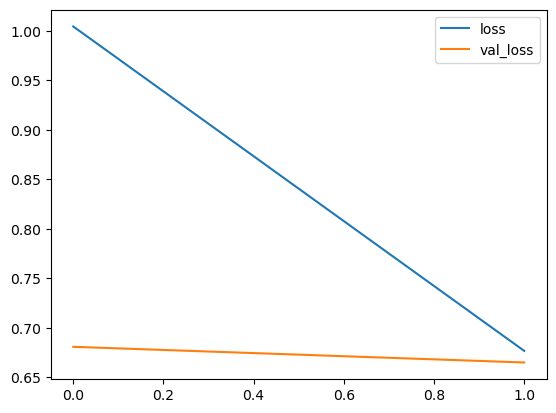

In [45]:
losses[['loss', 'val_loss']].plot()

In [46]:
[m.name for m in model.metrics]

['loss', 'accuracy']

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = np.argmax(model.predict(test_image_gen), axis=1)

163/163 [==============================] - 9s 57ms/step


<Axes: >

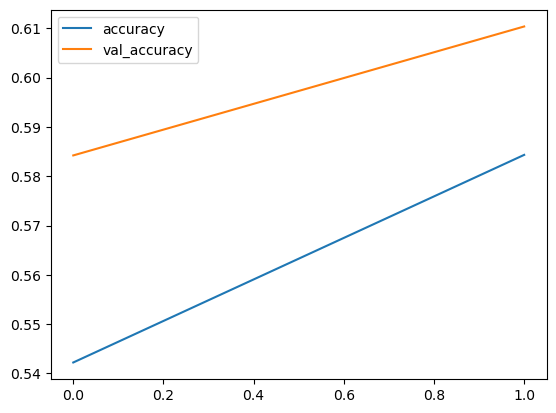

In [48]:
losses[['accuracy', 'val_accuracy']].plot()